## Applied Homework

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as smf


dir='/Users/shuya/Documents/Statistical Learning/Data/'
%matplotlib inline

## Question 10

This question should be answered using the Weekly data set, which
is part of the ISLR package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

(a) Produce some numerical and graphical summaries of the Weekly
data. Do there appear to be any patterns?

In [5]:
weekly = pd.read_csv(dir+'Weekly.csv', index_col=['Unnamed: 0'])
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [6]:
weekly['D_num'] = weekly['Direction'].map({'Up':1,'Down':0})
weekly = weekly.drop(['Direction'],axis=1)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


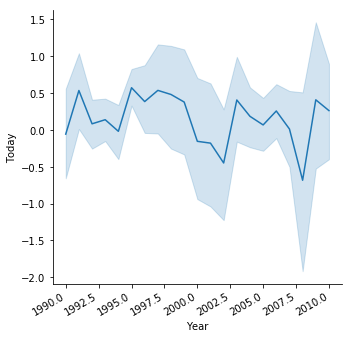

In [7]:
g = sns.relplot(x="Year", y="Today", kind="line", data=weekly)
g.fig.autofmt_xdate()

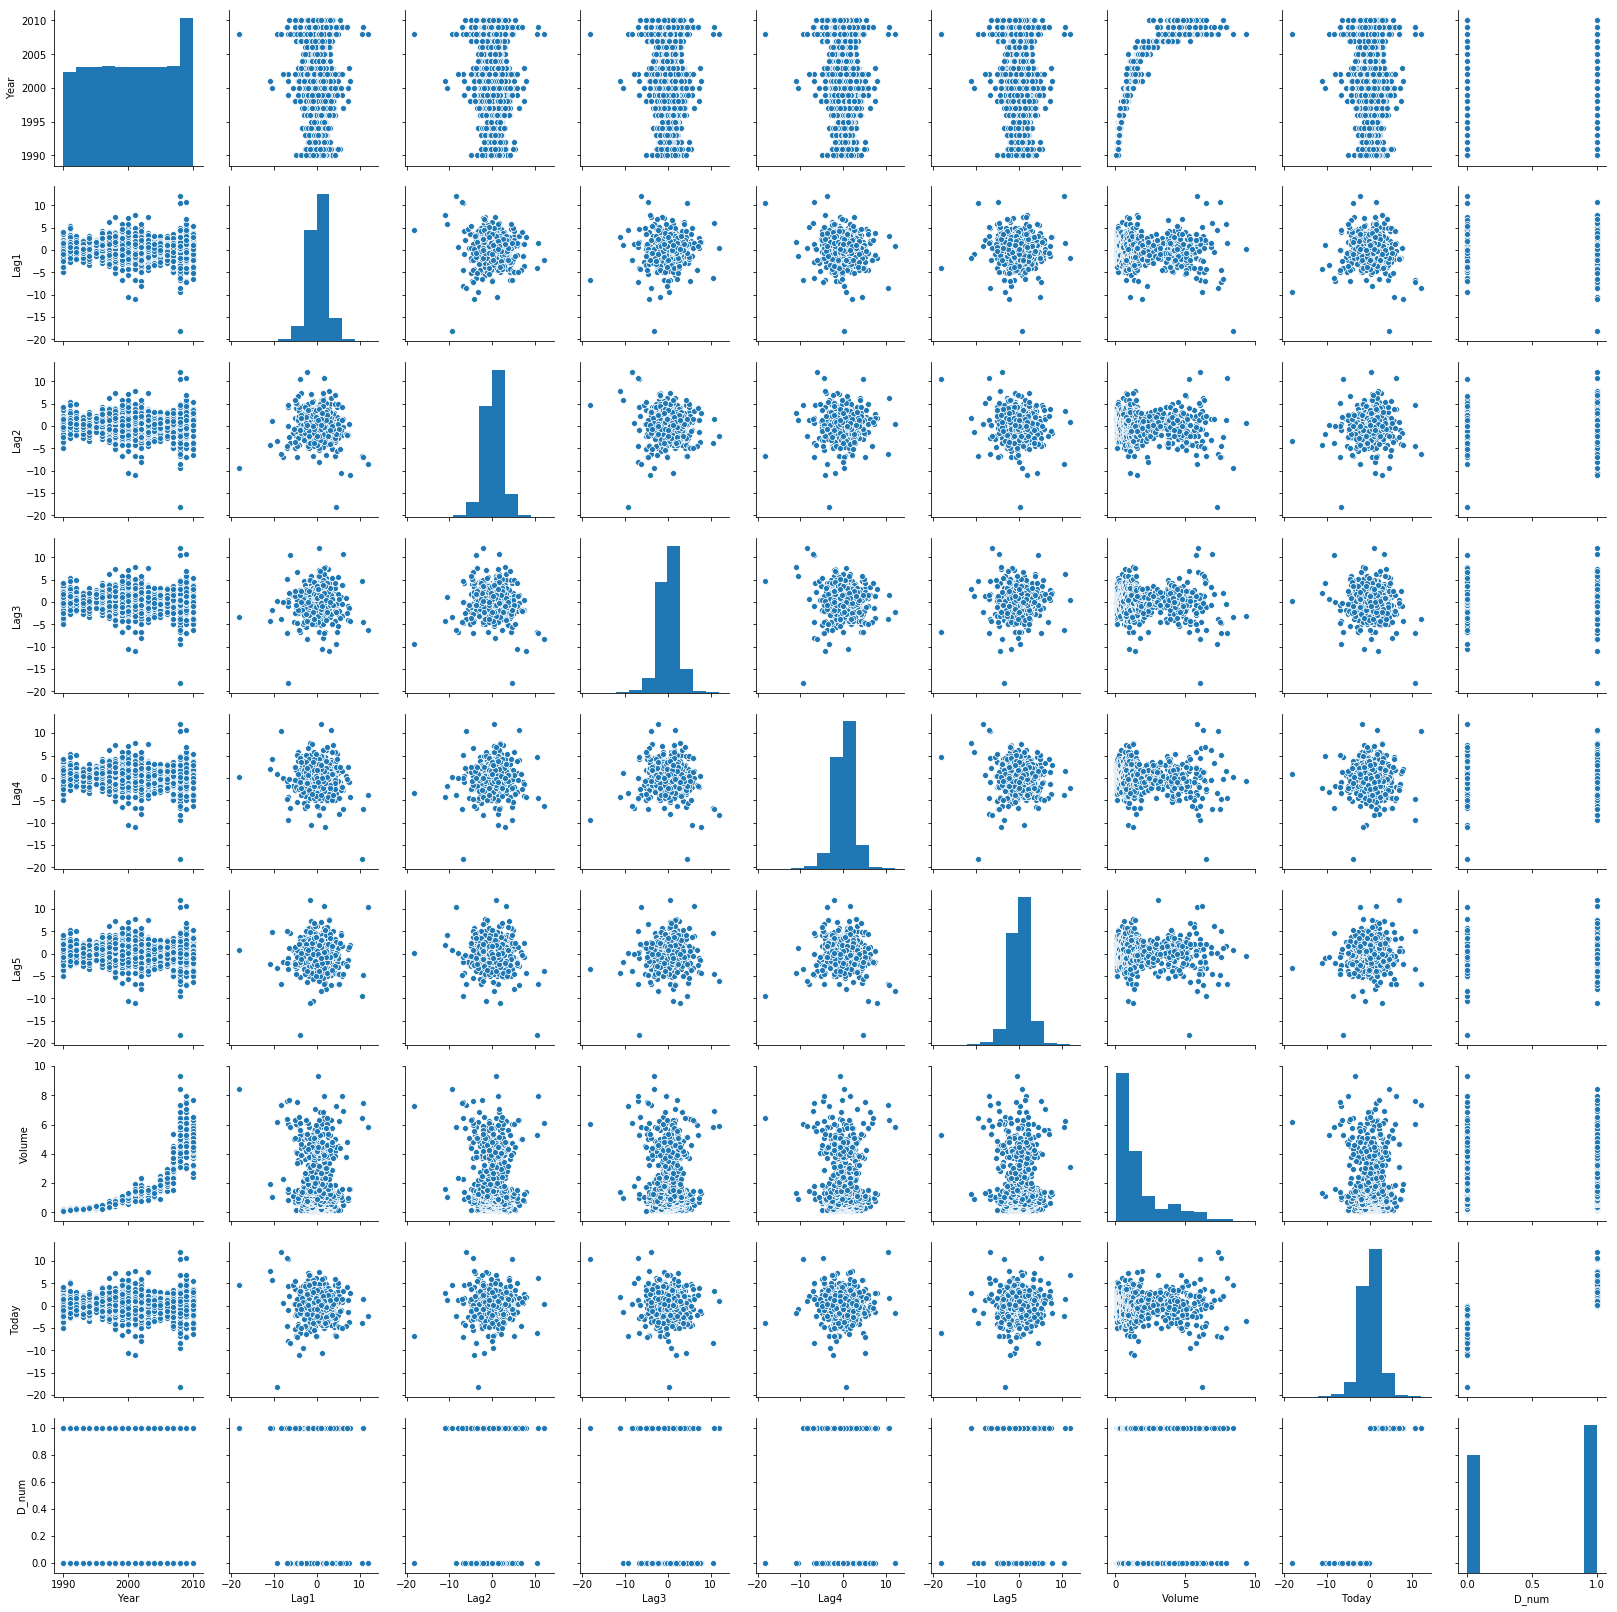

In [14]:
sns.pairplot(weekly)

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [76]:
model = smf.logit('D_num ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data=weekly)
logit_reg = model.fit()
logit_reg.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  D_num   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 14 Aug 2019   Pseudo R-squ.:                0.006580
Time:                        21:02:28   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [18]:
logit_reg2 = LogisticRegression(C=1e3)
'''
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger
    regularization.
'''
logit_reg2.fit(X = weekly.drop(['D_num'],axis = 1),y = weekly['D_num'])
logit_reg2.coef_
#different results because of penalty l1/l2

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-8.55338156e-05, -1.33031349e-01,  7.56479267e-02,
         3.53742068e-04, -2.24140106e-02,  1.00773431e-01,
         1.98983017e-01,  1.26300148e+01]])

(c) Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [86]:
pred = logit_reg.predict(weekly)
pred = [1 if p>0.5 else 0 for p in pred]
print(confusion_matrix(weekly['D_num'],pred))
print(accuracy_score(weekly['D_num'],pred))

[[ 54 430]
 [ 48 557]]
0.5610651974288338


In [117]:
print(weekly.groupby(['D_num'])['Today'].count())
print(sum([1 if x == 0 else 0 for x in pred]))
print(sum(pred))

D_num
0    484
1    605
Name: Today, dtype: int64
102
987


(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [126]:
train=weekly[(weekly['Year']<=2008) & (weekly['Year']>=1990)]
print(train.shape)
test=weekly[weekly['Year']>2008]
print(test.shape)

(985, 10)
(104, 10)


In [130]:
logit_reg2=smf.logit('D_num ~ Lag2',data=train).fit()
pred=logit_reg2.predict(test)
pred=[1 if p>0.5 else 0 for p in pred]
confusion_matrix(test['D_num'],pred)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


array([[ 9, 34],
       [ 5, 56]])

(e) Repeat (d) using LDA.

In [162]:
X_train=train['Lag2'].values.reshape(-1,1)
print(X_train.shape)
y_train=train['D_num']
print(y_train.shape)
X_test=test['Lag2'].values.reshape(-1,1)
y_test=test['D_num']

(985, 1)
(985,)


In [167]:
lda = LinearDiscriminantAnalysis().fit(X_train,y_train)
pred=lda.predict(X_test)
accuracy=(confusion_matrix(y_test,pred)[1][1]+confusion_matrix(y_test,pred)[0][0])/sum(sum(confusion_matrix(y_test,pred)))
print(confusion_matrix(y_test, pred))
print(accuracy)

[[ 9 34]
 [ 5 56]]
0.625


(f) Repeat (d) using QDA.

In [168]:
qda = QuadraticDiscriminantAnalysis().fit(X_train,y_train)
pred=qda.predict(X_test)
accuracy=(confusion_matrix(y_test,pred)[1][1]+confusion_matrix(y_test,pred)[0][0])/sum(sum(confusion_matrix(y_test,pred)))
print(confusion_matrix(y_test, pred))
print(accuracy)

[[ 0 43]
 [ 0 61]]
0.5865384615384616


(g) Repeat (d) using KNN with K = 1.

In [174]:
def run_knn(X_train,X_test,y_train,y_test,n):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train) 
    pred=neigh.predict(X_test)
    accuracy=(confusion_matrix(y_test,pred)[1][1]+confusion_matrix(y_test,pred)[0][0])/sum(sum(confusion_matrix(y_test,pred)))
    print(accuracy)

run_knn(X_train,X_test,y_train,y_test,1)


0.49038461538461536


(h) Which of these methods appears to provide the best results on
this data?


From this output it looks like logistic regression and LDA using only the feature
Lag2 perform best on the out-of-sample data.

## Question 11

11. In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.

In [21]:
auto=pd.read_csv(dir+'Auto.csv')
auto=auto.drop(['Unnamed: 0','name'],axis=1)
median=auto['mpg'].median()
auto['mpg01']=[1 if mpg>median else 0 for mpg in auto['mpg']]
auto=auto.drop(['mpg'],axis=1)
auto.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,0
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,0
4,8,302.0,140,3449,10.5,70,1,0


(b) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

In [22]:
corr_df=pd.DataFrame(auto.corr())
corr_df


,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


(c) Split the data into a training set and a test set.

In [62]:
train_size=0.7
auto=auto.sample(frac=1)
train=auto[:int(auto.shape[0]*train_size)]
test=auto[int(auto.shape[0]*train_size):]

(d) Perform LDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [66]:
lda = LinearDiscriminantAnalysis().fit(train.drop(['mpg01'],axis=1),train['mpg01'])
print(lda.coef_)
pred=lda.predict(test.drop(['mpg01'],axis=1))
accuracy=(confusion_matrix(test['mpg01'],pred)[1][1]+confusion_matrix(test['mpg01'],pred)[0][0])/sum(sum(confusion_matrix(test['mpg01'],pred)))
print(confusion_matrix(test['mpg01'], pred))
print('accuracy is ' + str(accuracy))
print('error rate is ' + str(1-accuracy))

[[-1.29835782  0.00319705  0.03415293 -0.00376599  0.11702917  0.32767833
   0.41751119]]
[[51  8]
 [ 3 56]]
accuracy is 0.9067796610169492
error rate is 0.09322033898305082


(e) Perform QDA on the training data in order to predict mpg01
using the variables that seemed most associated with mpg01 in
(b). What is the test error of the model obtained?

In [67]:
qda = QuadraticDiscriminantAnalysis().fit(train.drop(['mpg01'],axis=1),train['mpg01'])
pred=qda.predict(test.drop(['mpg01'],axis=1))
accuracy=(confusion_matrix(test['mpg01'],pred)[1][1]+confusion_matrix(test['mpg01'],pred)[0][0])/sum(sum(confusion_matrix(test['mpg01'],pred)))
print(confusion_matrix(test['mpg01'], pred))
print('accuracy is ' + str(accuracy))
print('error rate is ' + str(1-accuracy))

[[51  8]
 [ 7 52]]
accuracy is 0.8728813559322034
error rate is 0.1271186440677966


(f) Perform logistic regression on the training data in order to predict
mpg01 using the variables that seemed most associated with
mpg01 in (b). What is the test error of the model obtained?

In [72]:
lr=LogisticRegression(fit_intercept=True,C=1e9)
lr.fit(train.drop(['mpg01'],axis=1),train['mpg01'])
pred=lr.predict(test.drop(['mpg01'],axis=1))
accuracy=(confusion_matrix(test['mpg01'],pred)[1][1]+confusion_matrix(test['mpg01'],pred)[0][0])/sum(sum(confusion_matrix(test['mpg01'],pred)))
print(confusion_matrix(test['mpg01'], pred))
print('accuracy is ' + str(accuracy))
print('error rate is ' + str(1-accuracy))

[[53  6]
 [ 5 54]]
accuracy is 0.9067796610169492
error rate is 0.09322033898305082


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(g) Perform KNN on the training data, with several values of K, in
order to predict mpg01. Use only the variables that seemed most
associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [76]:
def run_knn(X_train,X_test,y_train,y_test,n):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train) 
    pred=neigh.predict(X_test)
    accuracy=(confusion_matrix(y_test,pred)[1][1]+confusion_matrix(y_test,pred)[0][0])/sum(sum(confusion_matrix(y_test,pred)))
    print(accuracy)

for n in range(1,10):
    run_knn(train.drop(['mpg01'],axis=1),test.drop(['mpg01'],axis=1),train['mpg01'],test['mpg01'],n)

0.8813559322033898
0.864406779661017
0.8898305084745762
0.864406779661017
0.8728813559322034
0.864406779661017
0.864406779661017
0.8728813559322034
0.8813559322033898


## Question 12

(a) Write a function, Power(), that prints out the result of raising 2
to the 3rd power. In other words, your function should compute
23 and print out the results.
Hint: Recall that x^a raises x to the power a. Use the print()
function to output the result.

In [79]:
def Power():
    print(2**3)
Power()

8


(b) Create a new function, Power2(), that allows you to pass any
two numbers, x and a, and prints out the value of x^a. You can
do this by beginning your function with the line
> Power2=function(x,a){

You should be able to call your function by entering, for instance,

> Power2(3,8)

on the command line. This should output the value of 38, namely, 6, 561.

In [81]:
def Power2(x,a):
    print(x**a)
Power2(3,8)

6561


(c) Using the Power2() function that you just wrote, compute 10^3,
8^17, and 131^3.

In [83]:
Power2(10,3)
Power2(8,17)
Power2(131,3)

1000
2251799813685248
2248091


(d) Now create a new function, Power3(), that actually returns the
result x^a as an R object, rather than simply printing it to the
screen. That is, if you store the value x^a in an object called
result within your function, then you can simply return() this result, using the following line:

>return (result)

The line above should be the last line in your function, before
the } symbol.

In [89]:
def Power3(x,a):
    return x**a

(e) Now using the Power3() function, create a plot of f(x) = x2.
The x-axis should display a range of integers from 1 to 10, and
the y-axis should display x2. Label the axes appropriately, and
use an appropriate title for the figure. Consider displaying either
the x-axis, the y-axis, or both on the log-scale. You can do this
by using log=‘‘x’’, log=‘‘y’’, or log=‘‘xy’’ as arguments to
the plot() function.

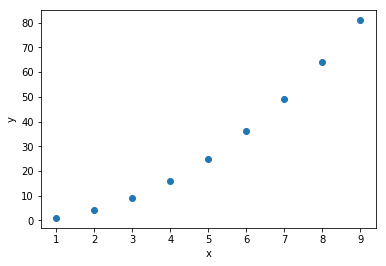

In [94]:
x=range(1,10,1)
y=[Power3(x,2) for x in x]
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

(f) Create a function, PlotPower(), that allows you to create a plot
of x against x^a for a fixed a and for a range of values of x. For
instance, if you call
> PlotPower(1:10,3)

then a plot should be created with an x-axis taking on values
1, 2, . . . , 10, and a y-axis taking on values 13, 23, . . . , 103.

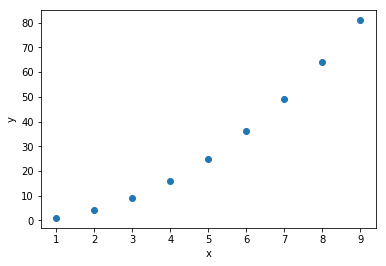

In [95]:
def PlotPower(x,a):
    y=[Power3(x,2) for x in x]
    plt.scatter(x,y)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()
    
PlotPower(range(1,10),3)    

13. Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using various subsets
of the predictors. Describe your findings.

In [100]:
boston=pd.read_csv(dir+'Boston.csv').drop(['Unnamed: 0'],axis=1)
boston.head()
median=boston['crim'].median()
boston['crim01']=[1 if crim>median else 0 for crim in boston['crim']]
boston=boston.drop(['crim'],axis=1)
boston.head()

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [109]:
train_size=0.7
boston=boston.sample(frac=1)
X_train=boston[:int(boston.shape[0]*train_size)].drop(['crim01'],axis=1)
y_train=boston[:int(boston.shape[0]*train_size)].crim01
X_test=boston[int(boston.shape[0]*train_size):].drop(['crim01'],axis=1)
y_test=boston[int(boston.shape[0]*train_size):].crim01

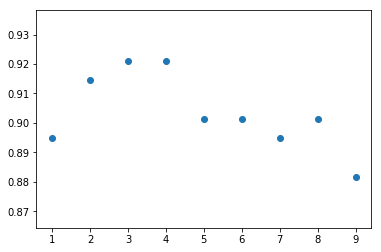

In [113]:
def run_knn(X_train,X_test,y_train,y_test,n):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train) 
    pred=neigh.predict(X_test)
    accuracy=(confusion_matrix(y_test,pred)[1][1]+confusion_matrix(y_test,pred)[0][0])/sum(sum(confusion_matrix(y_test,pred)))
    return accuracy

accuracy=[]   
for n in range(1,10):
    accuracy.append(run_knn(X_train,X_test,y_train,y_test,n))

plt.scatter(range(1,10),accuracy)
